## Listing 6.8. Processing the labels of the raw IMDB data

In [119]:
import numpy as np
import pandas as pd

*我瘋拉 找不到txt的IMDB data，沒事我就自己打程式 嗚嗚嗚*
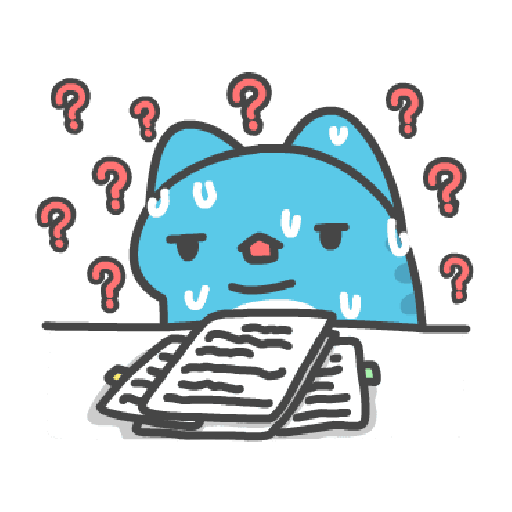
* kaggle的csv檔案: [IMDB data source href](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)
* GloVe檔案:[GloVe](https://nlp.stanford.edu/projects/glove/)
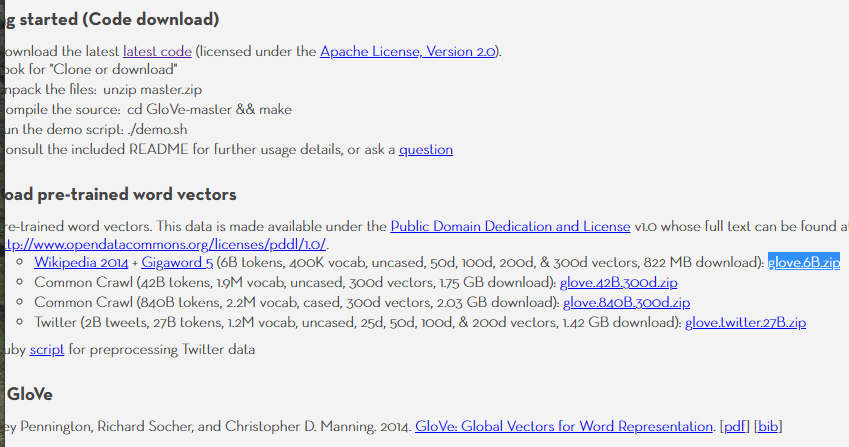
> 下載錯我救不了你喔~

In [120]:
df = pd.read_csv('C:/Users/Huang/Downloads/archive (2)/IMDB Dataset.csv')#就是csv沒什麼好說的

In [121]:
df['review'][0]#看一下第一則評論

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

* 查看是否有遺失值 這可是身為資料科學家的職業病

In [122]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [123]:
df.sample(1000)#這其實是抽樣1000 我只是玩玩看而已

,review,sentiment
33226,"Good film. Tells a boyish fantasy story, telli...",positive
42653,Ah Animorphs. I loved the book series and eage...,negative
11464,"Next to ""Star Wars"" and ""The Wizard of Oz,"" th...",positive
2958,To quote Clark Griswold (in the original Chris...,negative
9561,"A bunch of women who can't act sit around, tal...",negative
...,...,...
1760,Funny. Sad. Charming. These are all words that...,positive
712,Arguably the finest serial ever made(no argume...,positive
2709,"Okay, here is a really short review: this movi...",negative
5672,The Romanian cinema is little known out of Rom...,positive


In [124]:
#將正面或負面評價轉為0或是1
df['sentiment'].replace({'positive' : 1 , 'negative' : 0} , inplace = True)#

> 這下面是原始的程式碼但我不需要(雖然不小心執行了)

In [86]:
import os
imdb_dir = 'C:/Users/Huang/Downloads/aclImdb_v1/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read(encoding="utf-8"))
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

TypeError: TextIOWrapper.read() takes no keyword arguments

> 下面正式處理

In [125]:
from keras.utils import pad_sequences

In [126]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [127]:
texts=df

In [128]:
texts.columns=['indices', 'labels']#重新命名 因為我是懶惰蟲 想直接套上課的內容 懶得自己想

> 我疑心病可是很重的
----
*姿穎也說讚*  


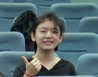
* 不要告訴他，不然我可能會被殺死


In [129]:
texts#再確認一下 我疑心病可是很重的

,indices,labels
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


##  Listing 6.9. Tokenizing the text of the raw IMDB data

In [130]:
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
import numpy as np
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

In [131]:
texts['indices']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: indices, Length: 50000, dtype: object

In [99]:
tokenizer = Tokenizer(num_words=max_words)
print(tokenizer)
tokenizer.fit_on_texts(texts['indices'])
sequences = tokenizer.texts_to_sequences(texts['indices'])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 124252 unique tokens.


In [101]:
texts['labels']

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: labels, Length: 50000, dtype: int64

In [102]:
data = pad_sequences(sequences, maxlen=maxlen)
data.shape

(50000, 100)

In [103]:
labels = texts['labels']

In [133]:
labels = texts['labels']
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
data

Shape of data tensor: (50000, 100)
Shape of label tensor: (50000,)


array([[ 123,  210, 3241, ...,  125, 4103,  486],
       [ 175, 3336,   96, ..., 1977,   69,  221],
       [  10,  190,    9, ...,   63,   16,  350],
       ...,
       [   7,   30,   86, ...,    2,    2, 6050],
       [8462, 5548,    2, ...,   67,  739,   42],
       [ 116,  699,  479, ...,  794,   11,   17]])

In [134]:
indices = np.arange(data.shape[0])
indices

array([    0,     1,     2, ..., 49997, 49998, 49999])

In [135]:
np.random.shuffle(indices)# 洗牌謝謝

### 區分訓練集和驗證集

In [172]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [173]:
data = data[indices]
labels = labels[indices]
print(data)
labels

[[1267 6144   35 ...  837  598  785]
 [  13   49  193 ... 3939  702  156]
 [  16  231  278 ...  405   10   58]
 ...
 [   1  280  418 ...    4    3 1546]
 [1474  198  123 ...    2  179 3210]
 [7407  676 1367 ...    4    3  449]]


array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [174]:
data

array([[1267, 6144,   35, ...,  837,  598,  785],
       [  13,   49,  193, ..., 3939,  702,  156],
       [  16,  231,  278, ...,  405,   10,   58],
       ...,
       [   1,  280,  418, ...,    4,    3, 1546],
       [1474,  198,  123, ...,    2,  179, 3210],
       [7407,  676, 1367, ...,    4,    3,  449]])

In [175]:
indices

array([32259, 28625, 20945, ...,  8078, 39499, 49563])

In [176]:
labels 

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [177]:
np.shape(x_train)

(200, 100)

In [178]:
np.shape(y_train)

(200,)

## Listing 6.10. Parsing the GloVe word-embeddings file

In [179]:
glove_dir = 'C:/Users/Huang/Downloads/glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'),encoding="utf-8")#什麼鬼
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


## Listing 6.11. Preparing the GloVe word-embeddings matrix

In [182]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [ 0.18257999,  0.75748998,  0.86418003, ..., -0.86106998,
        -0.26763001,  0.62862998],
       [ 0.12258   ,  0.04186   ,  0.0746    , ..., -0.0024238 ,
        -0.27325001, -1.00329995],
       [-0.17041001, -0.19625001,  1.20749998, ..., -0.023732  ,
        -0.36868   ,  0.48435   ]])

## Listing 6.12. Model definition

In [183]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_7 (Flatten)         (None, 10000)             0         
                                                                 
 dense_14 (Dense)            (None, 32)                320032    
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


## Listing 6.13. Loading pretrained word embeddings into the Embedding layer

In [184]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [185]:
#Listing 6.14. Training and evaluation
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train,epochs=10,batch_size=32, validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 2s 171ms/step - loss: 1.4422 - acc: 0.5050 - val_loss: 0.8585 - val_acc: 0.5024
Epoch 2/10
7/7 [==============================] - 1s 132ms/step - loss: 0.5421 - acc: 0.7250 - val_loss: 1.4061 - val_acc: 0.4976
Epoch 3/10
7/7 [==============================] - 1s 133ms/step - loss: 0.4829 - acc: 0.8250 - val_loss: 0.8673 - val_acc: 0.5138
Epoch 4/10
7/7 [==============================] - 1s 138ms/step - loss: 0.5417 - acc: 0.6950 - val_loss: 0.7261 - val_acc: 0.5413
Epoch 5/10
7/7 [==============================] - 1s 147ms/step - loss: 0.2556 - acc: 0.9150 - val_loss: 0.7018 - val_acc: 0.5631
Epoch 6/10
7/7 [==============================] - 1s 151ms/step - loss: 0.1166 - acc: 1.0000 - val_loss: 0.7806 - val_acc: 0.5516
Epoch 7/10
7/7 [==============================] - 1s 148ms/step - loss: 0.0777 - acc: 1.0000 - val_loss: 1.9161 - val_acc: 0.5027
Epoch 8/10
7/7 [==============================] - 1s 143ms/step - loss: 0.2288 - acc: 0.90

## Listing 6.14. Training and evaluation


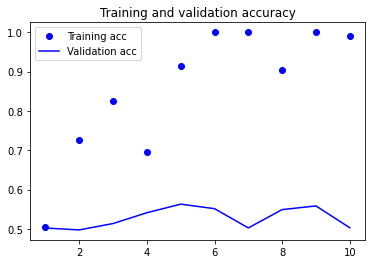

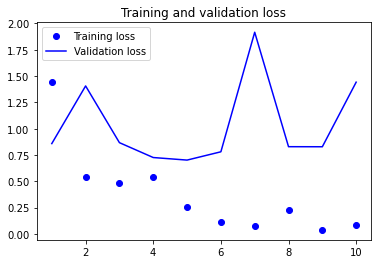

In [186]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



## Listing 6.16. Training the same model without pretrained word embeddings

In [187]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(optimizer='rmsprop',
 loss='binary_crossentropy',
 metrics=['acc'])
history = model.fit(x_train, y_train,
 epochs=10,
 batch_size=32,
 validation_data=(x_val, y_val))


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_8 (Flatten)         (None, 10000)             0         
                                                                 
 dense_16 (Dense)            (None, 32)                320032    
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 2s 192ms/step - loss: 0.6907 - acc: 0.5450 - val_loss: 0.6918 - val_acc: 0.5240
Epoch 2/10
7/7 [==============================

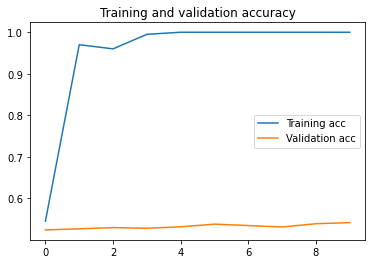

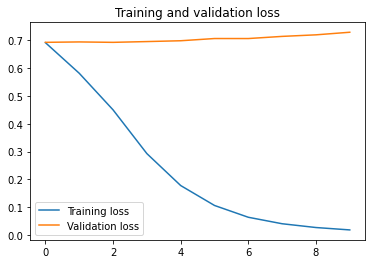

In [188]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [191]:
texts['indices'][12000:170000]

12000    it's all very simple. Jake goes to prison, and...
12001    What a waste of time! I've tried to sit throug...
12002    This was an interesting movie...half-comedy, h...
12003    I am sorry but this is the worst film I have e...
12004    This is a documentary unlike any other. It has...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: indices, Length: 38000, dtype: object

## Listing 6.17. Tokenizing the data of the test set

In [195]:
texts['indices']
sequences = tokenizer.texts_to_sequences(texts['indices'][12000:150000])
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(texts['labels'][12000:150000])

In [196]:
#Listing 6.18. Evaluating the model on the test set
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)#預測正確率0.5088一樣大"*" (不雅字眼自動消音)

1188/1188 [==============================] - 4s 3ms/step - loss: 1.4222 - acc: 0.5088


[1.4222412109375, 0.5087631344795227]

所以下一部份就是要挑戰有先後關係*記憶性*的RNN